In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [136]:
a= pd.read_csv("LSData_ESE_Jan-Feb.csv",skiprows=[0,1,2,3],header=1)
b=pd.read_csv("LSData_ESE_Mar-Apr.csv",skiprows=[0,1,2,3],header=1)
c=pd.read_csv("LSData_ESE_May-Jun.csv",skiprows=[0,1,2,3],header=1)
d=pd.read_csv("LSData_ESE_Jul-Aug.csv",skiprows=[0,1,2,3],header=1)
e=pd.read_csv("LSData_ESE_Sept-Oct.csv",skiprows=[0,1,2,3],header=1)
f=pd.read_csv("LSData_ESE_Nov-Dec.csv",skiprows=[0,1,2,3],header=1)

In [137]:
df=pd.concat([a,b,c,d,e,f])

In [138]:
df

,SI.No.,Meter Serial Number,Account ID,R Phase Voltage,Y Phase Voltage,B Phase Voltage,R Phase CURRENT,Y Phase CURRENT,B Phase CURRENT,Active Import,Active Export,Active Net,Appr Import,Appr Export,MeterReading DateTime
0,1,664189,LTCESEM01,234.0,267.0,236.0,50.0,42.5,35.0,15.00,0,15.00,15.75,0,1/1/2022 0:30
1,2,664189,LTCESEM01,234.0,267.0,236.0,52.5,45.0,32.5,15.00,0,15.00,16.00,0,1/1/2022 1:00
2,3,664189,LTCESEM01,235.0,268.0,237.0,52.5,42.5,30.0,14.50,0,14.50,15.50,0,1/1/2022 1:30
3,4,664189,LTCESEM01,235.0,269.0,238.0,55.0,40.0,30.0,14.25,0,14.25,15.25,0,1/1/2022 2:00
4,5,664189,LTCESEM01,235.0,269.0,238.0,52.5,42.5,30.0,14.50,0,14.50,15.50,0,1/1/2022 2:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2924,664189,LTCESEM01,238.0,268.0,239.0,42.5,25.0,45.0,14.00,0,14.00,14.50,0,12/31/2022 22:00
2924,2925,664189,LTCESEM01,235.0,265.0,236.0,40.0,27.5,37.5,12.75,0,12.75,13.25,0,12/31/2022 22:30
2925,2926,664189,LTCESEM01,235.0,265.0,236.0,40.0,25.0,35.0,12.50,0,12.50,13.00,0,12/31/2022 23:00
2926,2927,664189,LTCESEM01,236.0,267.0,238.0,42.5,27.5,35.0,13.00,0,13.00,13.50,0,12/31/2022 23:30


In [139]:
df.shape

(17472, 15)

In [140]:
df['Active Export'].nunique()

1

In [141]:
df['Meter Serial Number'].nunique()

1

In [142]:
df['Account ID'].nunique()

1

In [143]:
df['Appr Export'].nunique()

1

In [144]:
df['Active Net'].nunique()

137

In [145]:
df.corr()

C:\Users\SR-19\AppData\Local\Temp\ipykernel_10452\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SI.No.,Meter Serial Number,R Phase Voltage,Y Phase Voltage,B Phase Voltage,R Phase CURRENT,Y Phase CURRENT,B Phase CURRENT,Active Import,Active Export,Active Net,Appr Import,Appr Export
SI.No.,1.000000,NaN,0.036267,-0.046655,0.045890,-0.028308,-0.044689,0.052876,-0.009372,NaN,-0.009372,-0.009228,NaN
Meter Serial Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R Phase Voltage,0.036267,NaN,1.000000,0.662308,0.989920,0.114025,0.147183,0.158413,0.150414,NaN,0.150414,0.169939,NaN
Y Phase Voltage,-0.046655,NaN,0.662308,1.000000,0.665267,-0.023672,-0.055518,-0.103821,-0.035082,NaN,-0.035082,-0.060109,NaN
B Phase Voltage,0.045890,NaN,0.989920,0.665267,1.000000,0.142938,0.137584,0.156406,0.157140,NaN,0.157140,0.176008,NaN
R Phase CURRENT,-0.028308,NaN,0.114025,-0.023672,0.142938,1.000000,0.613849,0.752787,0.900217,NaN,0.900217,0.896718,NaN
Y Phase CURRENT,-0.044689,NaN,0.147183,-0.055518,0.137584,0.613849,1.000000,0.614094,0.821714,NaN,0.821714,0.833431,NaN
B Phase CURRENT,0.052876,NaN,0.158413,-0.103821,0.156406,0.752787,0.614094,1.000000,0.864815,NaN,0.864815,0.877057,NaN
Active Import,-0.009372,NaN,0.150414,-0.035082,0.157140,0.900217,0.821714,0.864815,1.000000,NaN,1.000000,0.989816,NaN
Active Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df.isnull().sum()

SI.No.                   0
Meter Serial Number      0
Account ID               0
R Phase Voltage          0
Y Phase Voltage          0
B Phase Voltage          0
R Phase CURRENT          0
Y Phase CURRENT          0
B Phase CURRENT          0
Active Import            0
Active Export            0
Active Net               0
Appr Import              0
Appr Export              0
MeterReading DateTime    0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17472 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SI.No.                 17472 non-null  int64  
 1   Meter Serial Number    17472 non-null  int64  
 2   Account ID             17472 non-null  object 
 3   R Phase Voltage        17472 non-null  float64
 4   Y Phase Voltage        17472 non-null  float64
 5   B Phase Voltage        17472 non-null  float64
 6   R Phase CURRENT        17472 non-null  float64
 7   Y Phase CURRENT        17472 non-null  float64
 8   B Phase CURRENT        17472 non-null  float64
 9   Active Import          17472 non-null  float64
 10  Active Export          17472 non-null  int64  
 11  Active Net             17472 non-null  float64
 12  Appr Import            17472 non-null  float64
 13  Appr Export            17472 non-null  int64  
 14  MeterReading DateTime  17472 non-null  object 
dtypes: 

In [148]:
df['MeterReading DateTime']=pd.to_datetime(df['MeterReading DateTime'])

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17472 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   SI.No.                 17472 non-null  int64         
 1   Meter Serial Number    17472 non-null  int64         
 2   Account ID             17472 non-null  object        
 3   R Phase Voltage        17472 non-null  float64       
 4   Y Phase Voltage        17472 non-null  float64       
 5   B Phase Voltage        17472 non-null  float64       
 6   R Phase CURRENT        17472 non-null  float64       
 7   Y Phase CURRENT        17472 non-null  float64       
 8   B Phase CURRENT        17472 non-null  float64       
 9   Active Import          17472 non-null  float64       
 10  Active Export          17472 non-null  int64         
 11  Active Net             17472 non-null  float64       
 12  Appr Import            17472 non-null  float64       
 13  Ap

In [150]:
df.columns

Index(['SI.No.', 'Meter Serial Number', 'Account ID', 'R Phase Voltage',
       'Y Phase Voltage', 'B Phase Voltage', 'R Phase CURRENT',
       'Y Phase CURRENT', 'B Phase CURRENT', 'Active Import', 'Active Export',
       'Active Net', 'Appr Import', 'Appr Export', 'MeterReading DateTime'],
      dtype='object')

In [151]:
df1=df.drop(columns=['Meter Serial Number','Account ID','Active Export','Appr Export','Active Net','SI.No.'])

In [153]:
df1

,R Phase Voltage,Y Phase Voltage,B Phase Voltage,R Phase CURRENT,Y Phase CURRENT,B Phase CURRENT,Active Import,Appr Import,MeterReading DateTime
0,234.0,267.0,236.0,50.0,42.5,35.0,15.00,15.75,2022-01-01 00:30:00
1,234.0,267.0,236.0,52.5,45.0,32.5,15.00,16.00,2022-01-01 01:00:00
2,235.0,268.0,237.0,52.5,42.5,30.0,14.50,15.50,2022-01-01 01:30:00
3,235.0,269.0,238.0,55.0,40.0,30.0,14.25,15.25,2022-01-01 02:00:00
4,235.0,269.0,238.0,52.5,42.5,30.0,14.50,15.50,2022-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...
2923,238.0,268.0,239.0,42.5,25.0,45.0,14.00,14.50,2022-12-31 22:00:00
2924,235.0,265.0,236.0,40.0,27.5,37.5,12.75,13.25,2022-12-31 22:30:00
2925,235.0,265.0,236.0,40.0,25.0,35.0,12.50,13.00,2022-12-31 23:00:00
2926,236.0,267.0,238.0,42.5,27.5,35.0,13.00,13.50,2022-12-31 23:30:00


In [154]:
df1.isnull().sum()

R Phase Voltage          0
Y Phase Voltage          0
B Phase Voltage          0
R Phase CURRENT          0
Y Phase CURRENT          0
B Phase CURRENT          0
Active Import            0
Appr Import              0
MeterReading DateTime    0
dtype: int64

In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17472 entries, 0 to 2927
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   R Phase Voltage        17472 non-null  float64       
 1   Y Phase Voltage        17472 non-null  float64       
 2   B Phase Voltage        17472 non-null  float64       
 3   R Phase CURRENT        17472 non-null  float64       
 4   Y Phase CURRENT        17472 non-null  float64       
 5   B Phase CURRENT        17472 non-null  float64       
 6   Active Import          17472 non-null  float64       
 7   Appr Import            17472 non-null  float64       
 8   MeterReading DateTime  17472 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.3 MB


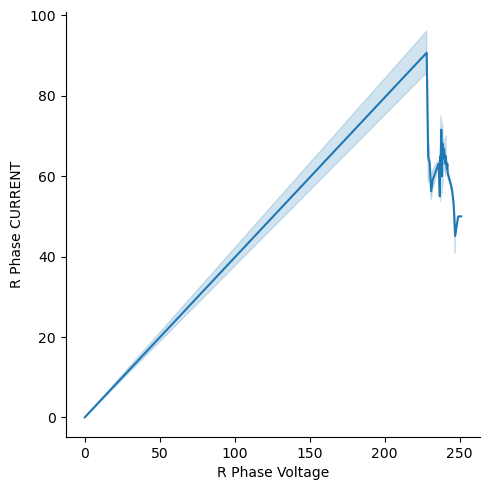

In [156]:
sns.relplot(data =df, x='R Phase Voltage', y='R Phase CURRENT',kind='line')

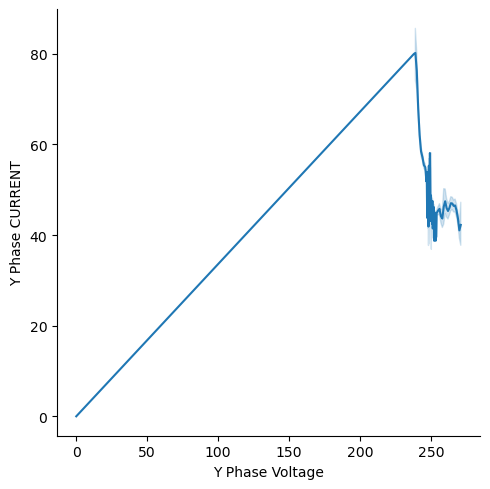

In [157]:
sns.relplot(data =df, x='Y Phase Voltage', y='Y Phase CURRENT',kind='line')

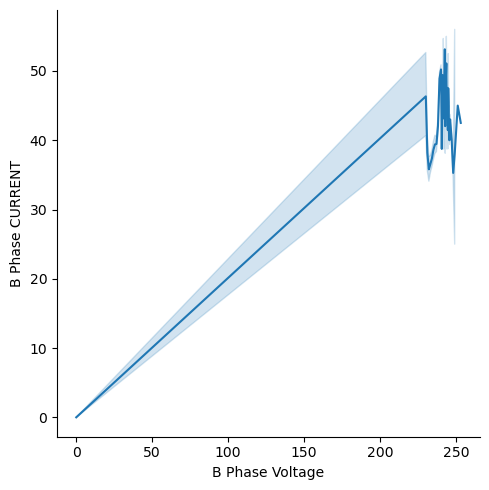

In [158]:
sns.relplot(data = df, x='B Phase Voltage', y='B Phase CURRENT',kind='line')

<Axes: xlabel='Active Import', ylabel='Appr Import'>

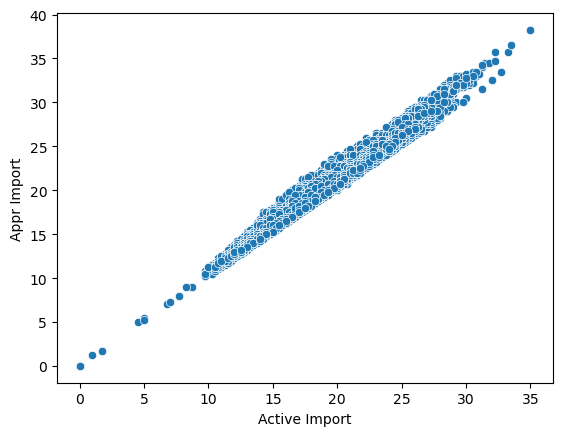

In [159]:
sns.scatterplot(data =df, x='Active Import', y='Appr Import')

<Axes: xlabel='MeterReading DateTime', ylabel='Appr Import'>

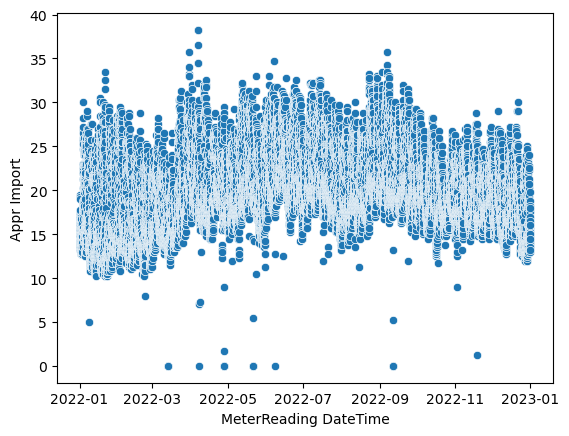

In [160]:
sns.scatterplot(data =df, x='MeterReading DateTime', y= 'Appr Import')

In [161]:
df.columns

Index(['SI.No.', 'Meter Serial Number', 'Account ID', 'R Phase Voltage',
       'Y Phase Voltage', 'B Phase Voltage', 'R Phase CURRENT',
       'Y Phase CURRENT', 'B Phase CURRENT', 'Active Import', 'Active Export',
       'Active Net', 'Appr Import', 'Appr Export', 'MeterReading DateTime'],
      dtype='object')

In [162]:
df1.columns

Index(['R Phase Voltage', 'Y Phase Voltage', 'B Phase Voltage',
       'R Phase CURRENT', 'Y Phase CURRENT', 'B Phase CURRENT',
       'Active Import', 'Appr Import', 'MeterReading DateTime'],
      dtype='object')

In [165]:
df.corr()

C:\Users\SR-19\AppData\Local\Temp\ipykernel_10452\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SI.No.,Meter Serial Number,R Phase Voltage,Y Phase Voltage,B Phase Voltage,R Phase CURRENT,Y Phase CURRENT,B Phase CURRENT,Active Import,Active Export,Active Net,Appr Import,Appr Export
SI.No.,1.000000,NaN,0.036267,-0.046655,0.045890,-0.028308,-0.044689,0.052876,-0.009372,NaN,-0.009372,-0.009228,NaN
Meter Serial Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R Phase Voltage,0.036267,NaN,1.000000,0.662308,0.989920,0.114025,0.147183,0.158413,0.150414,NaN,0.150414,0.169939,NaN
Y Phase Voltage,-0.046655,NaN,0.662308,1.000000,0.665267,-0.023672,-0.055518,-0.103821,-0.035082,NaN,-0.035082,-0.060109,NaN
B Phase Voltage,0.045890,NaN,0.989920,0.665267,1.000000,0.142938,0.137584,0.156406,0.157140,NaN,0.157140,0.176008,NaN
R Phase CURRENT,-0.028308,NaN,0.114025,-0.023672,0.142938,1.000000,0.613849,0.752787,0.900217,NaN,0.900217,0.896718,NaN
Y Phase CURRENT,-0.044689,NaN,0.147183,-0.055518,0.137584,0.613849,1.000000,0.614094,0.821714,NaN,0.821714,0.833431,NaN
B Phase CURRENT,0.052876,NaN,0.158413,-0.103821,0.156406,0.752787,0.614094,1.000000,0.864815,NaN,0.864815,0.877057,NaN
Active Import,-0.009372,NaN,0.150414,-0.035082,0.157140,0.900217,0.821714,0.864815,1.000000,NaN,1.000000,0.989816,NaN
Active Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


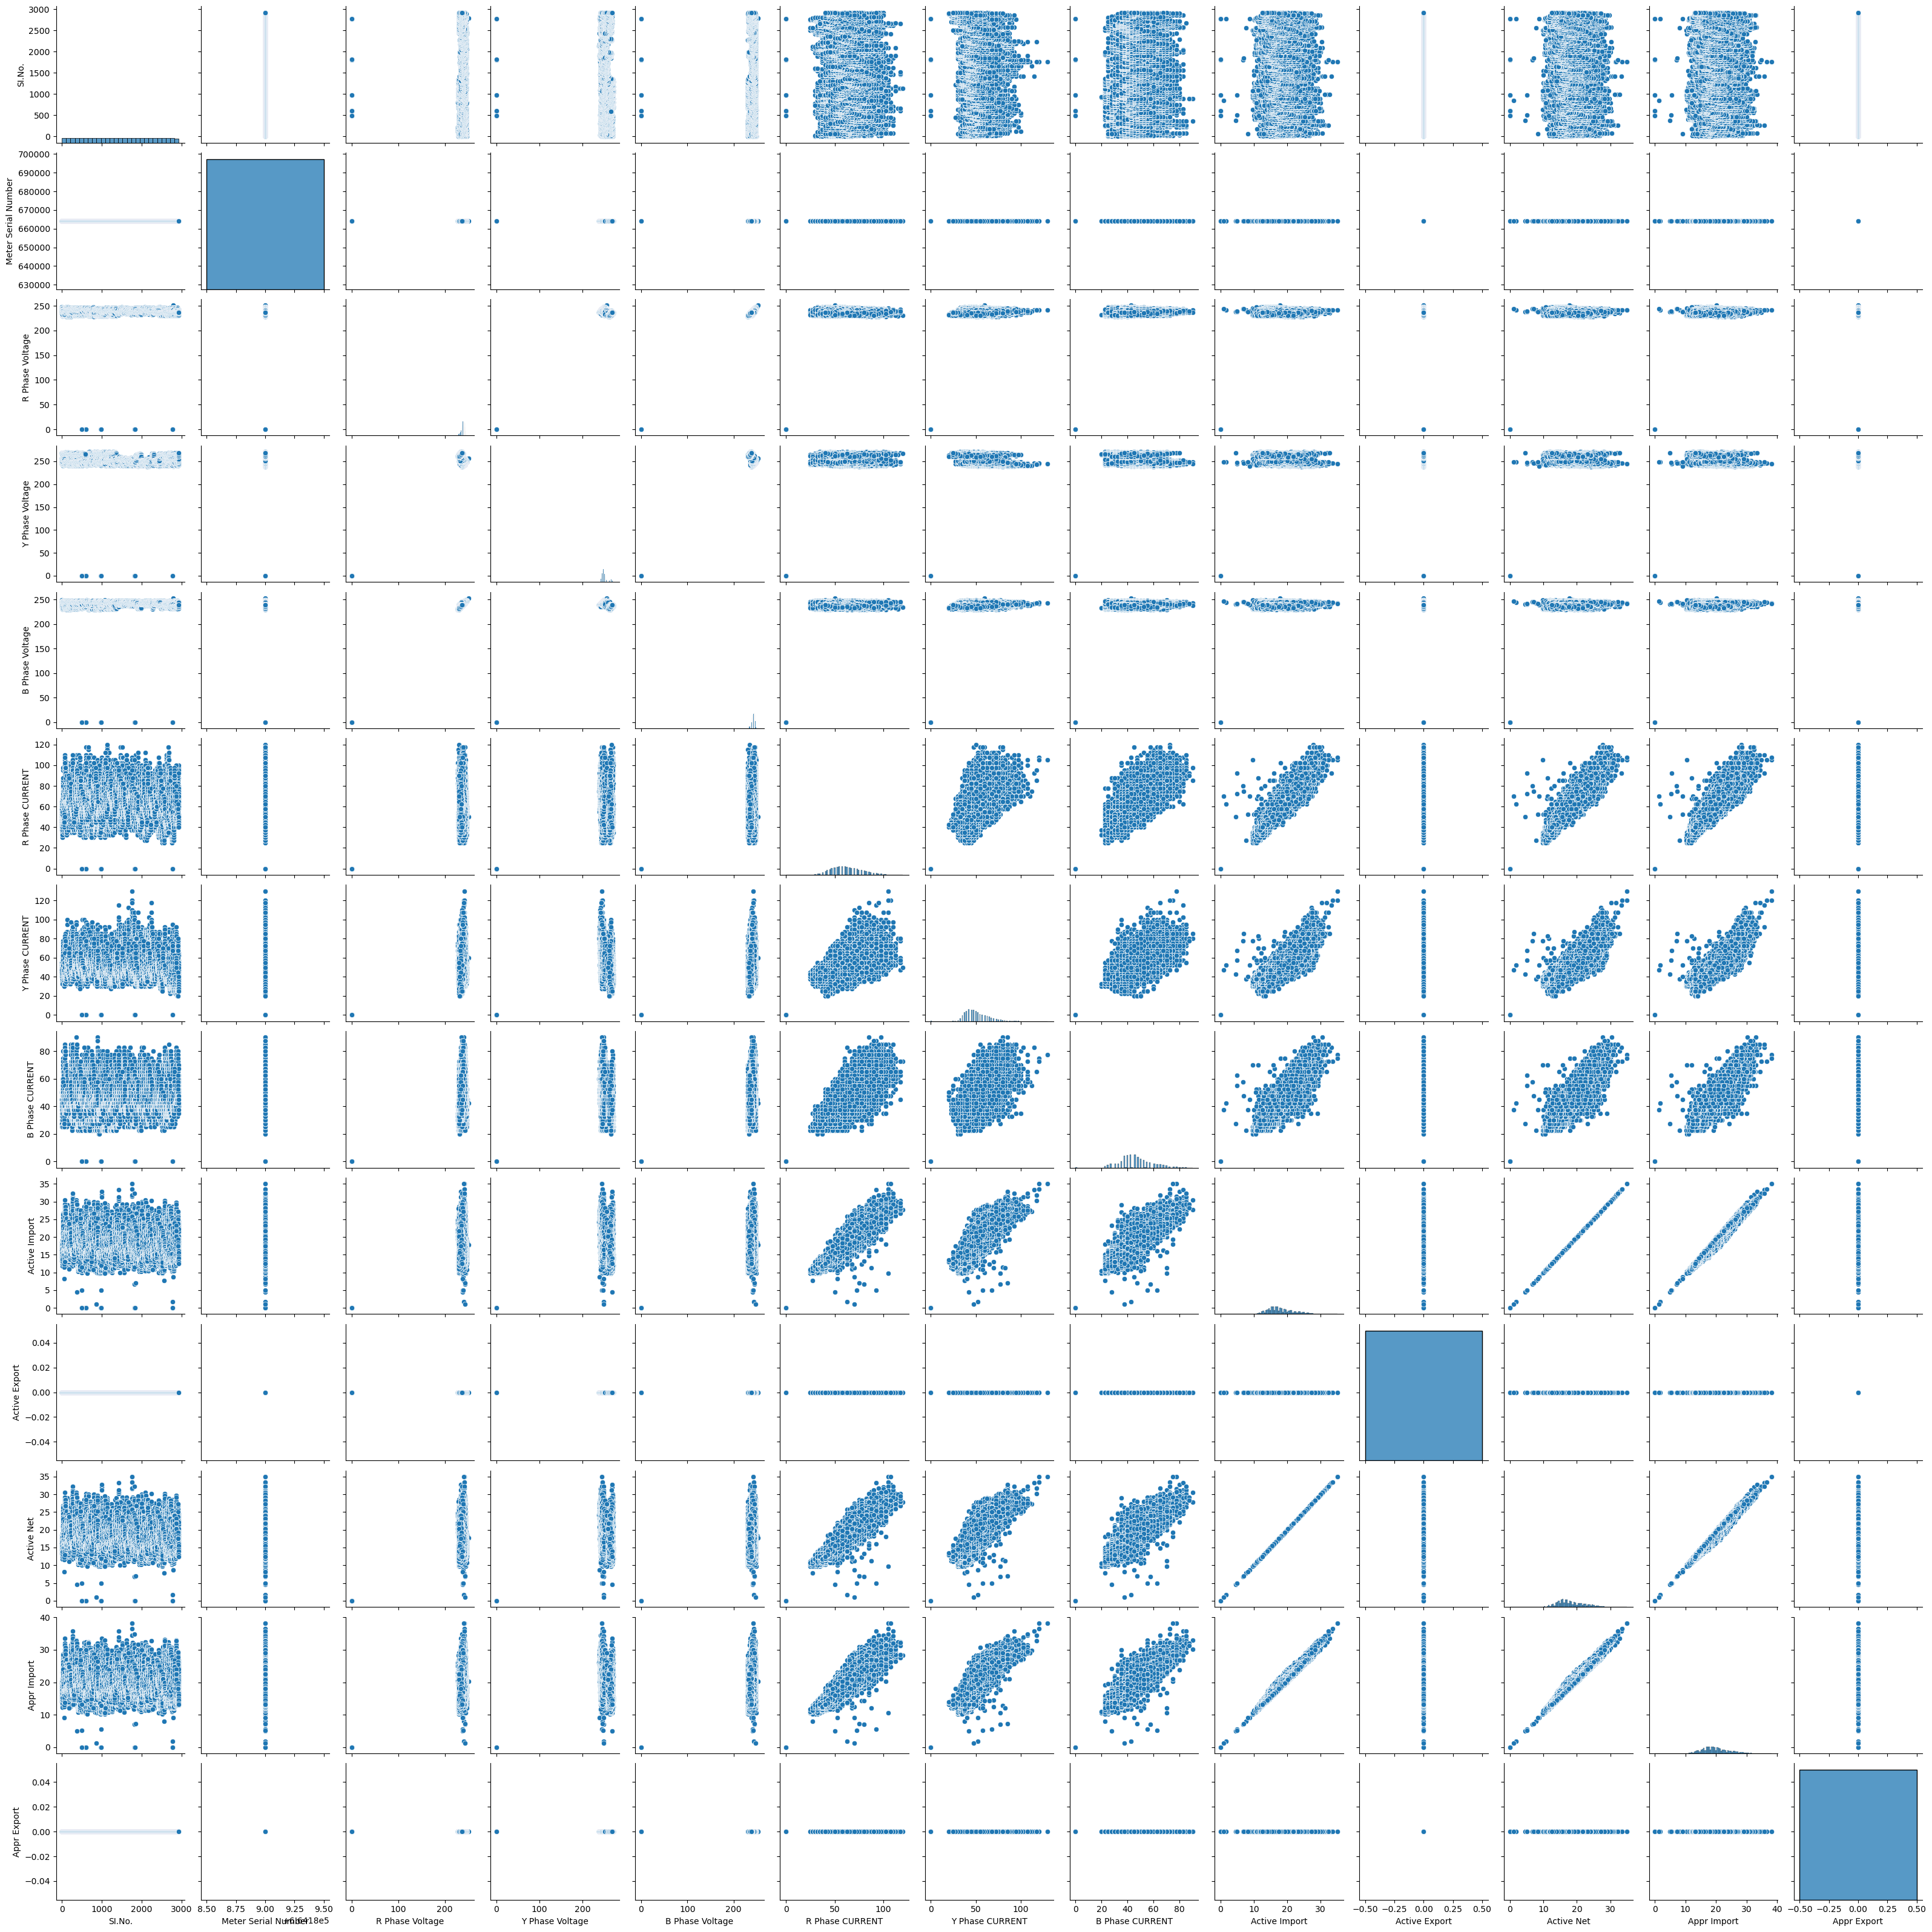

In [166]:
sns.pairplot(df)

In [164]:
df1.corr()

C:\Users\SR-19\AppData\Local\Temp\ipykernel_10452\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,R Phase Voltage,Y Phase Voltage,B Phase Voltage,R Phase CURRENT,Y Phase CURRENT,B Phase CURRENT,Active Import,Appr Import
R Phase Voltage,1.000000,0.662308,0.989920,0.114025,0.147183,0.158413,0.150414,0.169939
Y Phase Voltage,0.662308,1.000000,0.665267,-0.023672,-0.055518,-0.103821,-0.035082,-0.060109
B Phase Voltage,0.989920,0.665267,1.000000,0.142938,0.137584,0.156406,0.157140,0.176008
R Phase CURRENT,0.114025,-0.023672,0.142938,1.000000,0.613849,0.752787,0.900217,0.896718
Y Phase CURRENT,0.147183,-0.055518,0.137584,0.613849,1.000000,0.614094,0.821714,0.833431
B Phase CURRENT,0.158413,-0.103821,0.156406,0.752787,0.614094,1.000000,0.864815,0.877057
Active Import,0.150414,-0.035082,0.157140,0.900217,0.821714,0.864815,1.000000,0.989816
Appr Import,0.169939,-0.060109,0.176008,0.896718,0.833431,0.877057,0.989816,1.000000


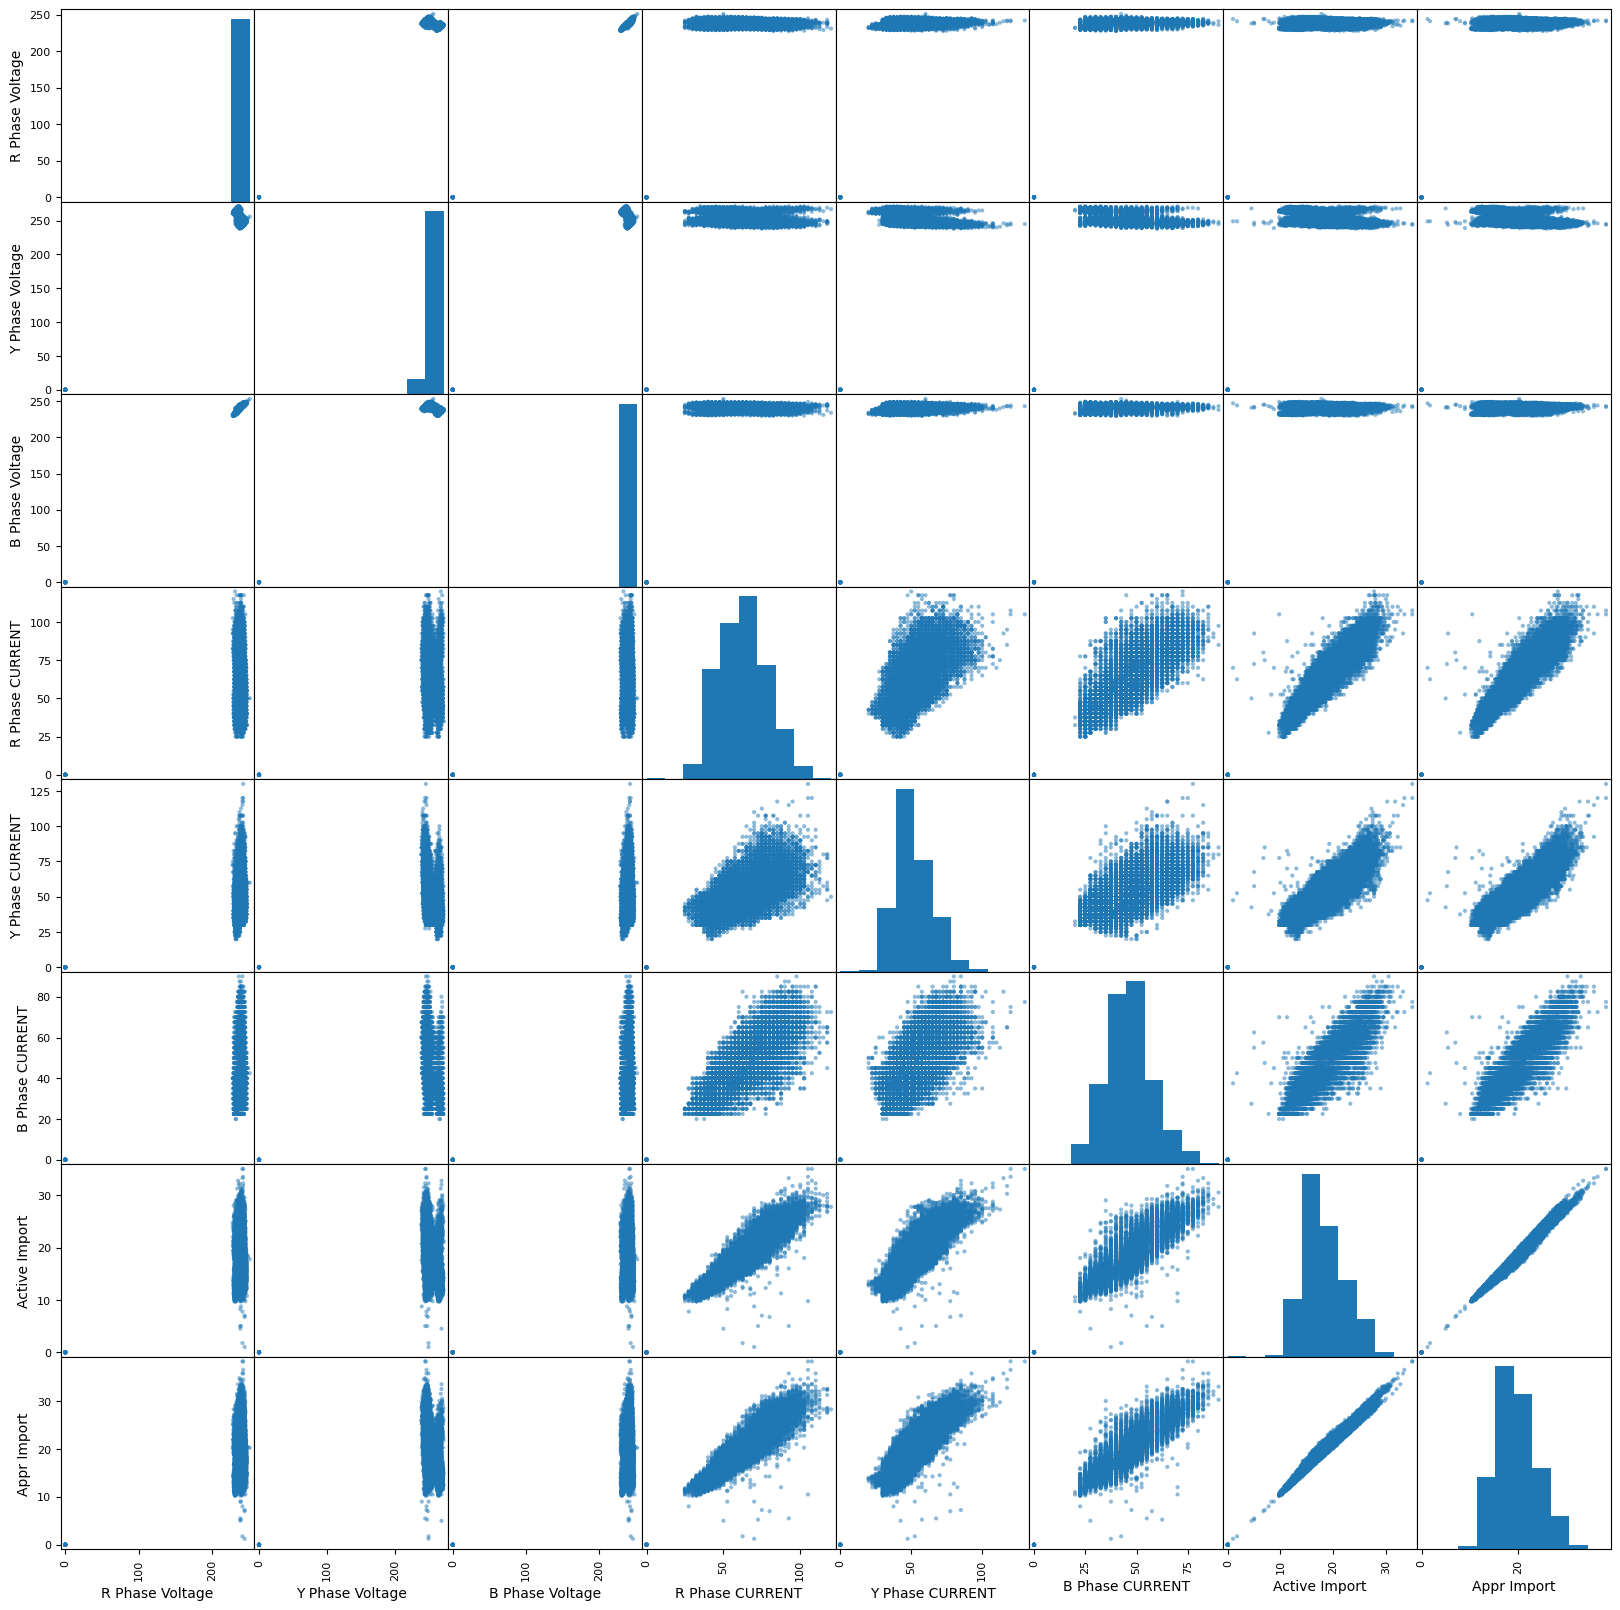

In [133]:
pd.plotting.scatter_matrix(df,figsize =(20,20))
plt.show()

In [167]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Account ID'] = encoder.fit_transform(df['Account ID'])

In [171]:
df['Account ID']

0       0
1       0
2       0
3       0
4       0
       ..
2923    0
2924    0
2925    0
2926    0
2927    0
Name: Account ID, Length: 17472, dtype: int32

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17472 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   SI.No.                 17472 non-null  int64         
 1   Meter Serial Number    17472 non-null  int64         
 2   Account ID             17472 non-null  int32         
 3   R Phase Voltage        17472 non-null  float64       
 4   Y Phase Voltage        17472 non-null  float64       
 5   B Phase Voltage        17472 non-null  float64       
 6   R Phase CURRENT        17472 non-null  float64       
 7   Y Phase CURRENT        17472 non-null  float64       
 8   B Phase CURRENT        17472 non-null  float64       
 9   Active Import          17472 non-null  float64       
 10  Active Export          17472 non-null  int64         
 11  Active Net             17472 non-null  float64       
 12  Appr Import            17472 non-null  float64       
 13  Ap

In [182]:
df1

,R Phase Voltage,Y Phase Voltage,B Phase Voltage,R Phase CURRENT,Y Phase CURRENT,B Phase CURRENT,Active Import,Appr Import,MeterReading DateTime
0,234.0,267.0,236.0,50.0,42.5,35.0,15.00,15.75,2022-01-01 00:30:00
1,234.0,267.0,236.0,52.5,45.0,32.5,15.00,16.00,2022-01-01 01:00:00
2,235.0,268.0,237.0,52.5,42.5,30.0,14.50,15.50,2022-01-01 01:30:00
3,235.0,269.0,238.0,55.0,40.0,30.0,14.25,15.25,2022-01-01 02:00:00
4,235.0,269.0,238.0,52.5,42.5,30.0,14.50,15.50,2022-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...
2923,238.0,268.0,239.0,42.5,25.0,45.0,14.00,14.50,2022-12-31 22:00:00
2924,235.0,265.0,236.0,40.0,27.5,37.5,12.75,13.25,2022-12-31 22:30:00
2925,235.0,265.0,236.0,40.0,25.0,35.0,12.50,13.00,2022-12-31 23:00:00
2926,236.0,267.0,238.0,42.5,27.5,35.0,13.00,13.50,2022-12-31 23:30:00


In [271]:
X = df1.iloc[:,0:7]
#X= df1[['Active Import']]
y= df1[['Appr Import']]

In [272]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.2,random_state=42)

In [273]:
X_train,X_test,y_train,y_test

(      R Phase Voltage  Y Phase Voltage  B Phase Voltage  R Phase CURRENT  \
 1611            242.0            251.0            247.0             80.0   
 2064            243.0            251.0            246.0             62.5   
 2604            233.0            262.0            235.0             37.5   
 93              240.0            246.0            243.0             70.0   
 1539            240.0            256.0            244.0             52.5   
 ...               ...              ...              ...              ...   
 2596            243.0            253.0            246.0             60.0   
 348             237.0            244.0            240.0             55.0   
 2558            242.0            248.0            244.0             62.5   
 860             235.0            269.0            236.0             52.5   
 1251            244.0            252.0            247.0             67.5   
 
       Y Phase CURRENT  B Phase CURRENT  Active Import  
 1611            

In [274]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [275]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)

0.2037475875989815

In [276]:
r2_score(y_test,y_pred)

0.9892356606624686

In [277]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred2 = dt_model.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred2)

0.26055731444921315

In [278]:
r2_score(y_test,y_pred2)

0.9862343040098835

In [279]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred3 = rf_model.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred3)

C:\Users\SR-19\AppData\Local\Temp\ipykernel_10452\3903092261.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.12819969348517987

In [280]:
r2_score(y_test,y_pred3)

0.9932269872742833